![logo](1_bDwEvCRgrKVbLrAXEixpfA.png)
___

##### import libraries

In [61]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline 
sns.set(color_codes=True)

import functools as ft

#natural language processing
#!pip install nltk
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import ngrams

#bag of words model
from sklearn.feature_extraction.text import CountVectorizer
import re

#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#classification 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

#visualizations
#!pip install wordcloud
from wordcloud import WordCloud
from pylab import *

# Step 4 - Analysis II
    a) Importing data
    
    b) TF-IDF
        i) Unigram
       ii) Bigram
      iii) Trigram
    
    c) Corpus Visualizations

### a) Importing data

In [2]:
#import cleaned2_data.csv file
cleaned2_df = pd.read_csv("cleaned2_data_pca.csv")

cleaned2_df.drop(['Unnamed: 0'], axis=1, inplace=True)

print(cleaned2_df.shape)

(10062, 22)


In [3]:
#import corpus_data.csv file
corpus_df = pd.read_csv("corpus_data.csv")

corpus_df.drop(['Unnamed: 0'], axis=1, inplace=True)

print(corpus_df.shape)
corpus_df.head()

(10062, 1)


,blurb
0,treehouse cornell take architecture new height...
1,track collection new original musical piece jo...
2,juxtaposing delicious food good friend unsettl...
3,melody mus tell story melody struggle encounte...
4,mission help build passion science teaching ne...


##### Check for NaN Values in corpus_df

In [4]:
is_NaN = corpus_df.isna()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = corpus_df[row_has_NaN]
print(rows_with_NaN)

Empty DataFrame
Columns: [blurb]
Index: []


In [5]:
print(corpus_df.isna().sum())

blurb    0
dtype: int64


### b) TF-IDF (Unigrams, Bigrams, and Trigrams)

##### i) Unigrams

In [44]:
#entire corpus series into seperate strings
corpus_series = corpus_df['blurb'].apply(lambda x: str(x))
print(type(corpus_series[0]))

print(len(corpus_series))
corpus_series

<class 'str'>
10062


0        treehouse cornell take architecture new height...
1        track collection new original musical piece jo...
2        juxtaposing delicious food good friend unsettl...
3        melody mus tell story melody struggle encounte...
4        mission help build passion science teaching ne...
                               ...                        
10057    aim create timeless song teach thing god gener...
10058    multimedia memoir film formed tapestry prose p...
10059    heliopolis small storefront located greenpoint...
10060    inspiring jewish chant song peace joyful harmo...
10061    torrefy need help printing first run new album...
Name: blurb, Length: 10062, dtype: object

In [45]:
#getting unigrams  
vectorizer = CountVectorizer() 
X1 = vectorizer.fit_transform(corpus_series)  
features = (vectorizer.get_feature_names()) 

#applying TFIDF for unigrams
vectorizer = TfidfVectorizer() 
X2 = vectorizer.fit_transform(corpus_series) 
scores = (X2.toarray()) 

#getting top-ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0, col] )) 
uni_ranking = pd.DataFrame(data1, columns = ['term', 'rank']) 
uni_words = (uni_ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords : \n", uni_words.head(20)) 



Words : 
           term        rank
6531      help  165.897106
9718       new  139.641998
772        art  110.369324
1628      book  109.002543
344      album  105.287112
5289      film   98.879661
9520     music   95.619674
5339     first   95.034016
15856    world   94.677695
9664      need   92.269544
8630      make   90.094293
13729    story   89.440586
8217      life   87.469702
10068      one   80.539478
8440      love   79.839196
11249  project   72.909087
5901       get   72.752287
12781   series   69.188033
15959     year   68.964040
790     artist   67.600017


##### ii) Bigrams

In [31]:
#getting bigrams  
vectorizer = CountVectorizer(ngram_range =(2, 2)) 
X1 = vectorizer.fit_transform(corpus_series)  
features = (vectorizer.get_feature_names()) 

#applying TFIDF for bigrams
vectorizer = TfidfVectorizer(ngram_range =(2, 2)) 
X2 = vectorizer.fit_transform(corpus_series) 
scores = (X2.toarray()) 

#getting top-ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0, col] )) 
bi_ranking = pd.DataFrame(data1, columns = ['term', 'rank']) 
bi_words = (bi_ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords : \n", bi_words.head(20)) 



Words : 
                 term       rank
22017     enamel pin  36.526032
47828      need help  34.470738
63506     short film  28.892953
28675    full length  17.507847
53917   playing card  17.367218
32445    hard enamel  16.744082
33161      help fund  16.187890
11537     child book  15.608867
46995    music video  15.084399
33237      help make  14.447327
31352  graphic novel  13.243412
18058    debut album  12.866378
33166       help get  12.564496
48134      new album  12.453750
4707   award winning  12.401338
40140   length album  12.158833
61448         sci fi  11.368919
33061     help bring  11.210558
78912       year old  11.089349
76490     web series  10.895128


##### iii) Trigrams

In [32]:
#getting trigrams  
vectorizer = CountVectorizer(ngram_range = (3,3)) 
X1 = vectorizer.fit_transform(corpus_series)  
features = (vectorizer.get_feature_names())  

#applying TFIDF 
vectorizer = TfidfVectorizer(ngram_range = (3,3)) 
X2 = vectorizer.fit_transform(corpus_series) 
scores = (X2.toarray())  
  
#getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0,col] )) 
tri_ranking = pd.DataFrame(data1, columns = ['term','rank']) 
tri_words = (tri_ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords head : \n", tri_words.head(20)) 



Words head : 
                           term       rank
33752          hard enamel pin  16.407152
29725        full length album  11.958650
27711        first full length   6.140670
34836         help make happen   4.672843
51141            new york city   4.597027
18806        deck playing card   4.413598
22567      enamel pin inspired   4.223605
1495           album need help   3.993997
50120           need help make   3.770010
63628        role playing game   3.707530
13092        coffee table book   3.437649
34990          help raise fund   3.112006
50102           need help fund   3.089152
50105            need help get   2.937158
12009       child picture book   2.912715
21134          dream come true   2.763573
1518       album original song   2.707635
18668        debut full length   2.634361
64791  science fiction fantasy   2.542458
22586           enamel pin set   2.491715


### c) Corpus Visualizations

In [74]:
print(corpus_df.head())
corpus_all = ' '.join(corpus_df['blurb'])

                                               blurb
0  treehouse cornell take architecture new height...
1  track collection new original musical piece jo...
2  juxtaposing delicious food good friend unsettl...
3  melody mus tell story melody struggle encounte...
4  mission help build passion science teaching ne...


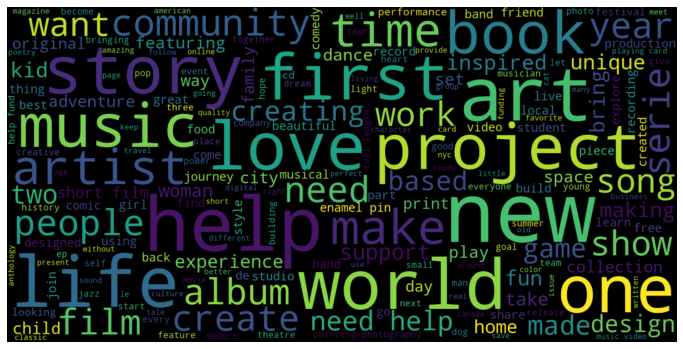

In [24]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(corpus_all)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Top 300 words')

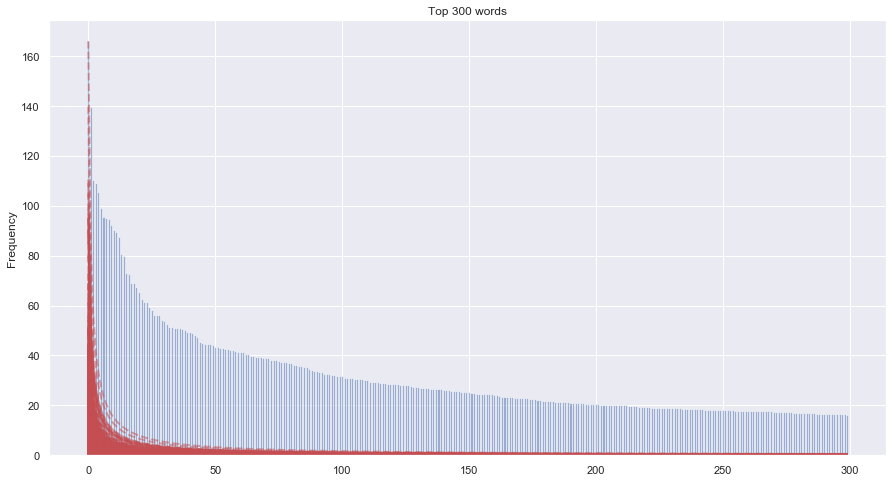

In [58]:
y_pos = np.arange(300)
plt.figure(figsize=(15,8))
s = 1
expected_zipf = [uni_ranking.sort_values(by='rank', ascending=False)['rank']/(i+1)**s for i in y_pos]
plt.bar(y_pos, uni_ranking.sort_values(by='rank', ascending=False)['rank'][:300], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 300 words')

### End of Step 5